<a href="https://colab.research.google.com/github/NavyasreeBalu/PredictBikeSharingDemand/blob/master/Predict_Bike_Sharing_Demand_with_AutoGluon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Bike Sharing Demand with AutoGluon


## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 76.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.0.1
    Uninstalling pip-25.0.1:
      Successfully uninstalled pip-25.0.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 65.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 80.1.0
    Uninstalling setuptools-80.1.0:
      Successfully uninstalled setuptools-80.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dash 2.18.1 requires dash-core-components==2.0.0, which is not installed.
dash 2.18.1 requires dash-html-components==2.0.0, which is not installed.
dash 2.18.1 requires dash-table==5.0.0, which is not installed.
dash 2.18.1 requires Flask<3.1,>=1.0.4, but you have flask 3.1.0 which is incompatible.
dash 2.18.1 requires Werkzeug<3.1, but you have werkzeug 

### Setup Kaggle API Key

In [1]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [2]:
import os
import json

# Kaggle credentials
kaggle_username = "navyasreebalu"
kaggle_key = "924a79dccae4f208202624b1a1f35c06"

# Create .kaggle directory in home directory
kaggle_dir = os.path.join(os.path.expanduser("~"), ".kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

# Save API token
kaggle_json_path = os.path.join(kaggle_dir, "kaggle.json")
with open(kaggle_json_path, "w") as f:
    json.dump({"username": kaggle_username, "key": kaggle_key}, f)

os.chmod(kaggle_json_path, 0o600)

print(f"Kaggle API token saved to: {kaggle_json_path}")


Kaggle API token saved to: /root/.kaggle/kaggle.json


### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [3]:
!pip install kaggle
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 517MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [10]:
import pandas as pd
!pip install autogluon
from autogluon.tabular import TabularPredictor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━

In [11]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv", parse_dates=["datetime"])

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [12]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
print(train.describe())

print("\nUnique values in 'season':", train['season'].unique())
print("Unique values in 'weather':", train['weather'].unique())

print("\nDate range:", train['datetime'].min(), "to", train['datetime'].max())

print("\nMissing values:\n", train.isnull().sum())


                            datetime        season       holiday  \
count                          10886  10886.000000  10886.000000   
mean   2011-12-27 05:56:22.399411968      2.506614      0.028569   
min              2011-01-01 00:00:00      1.000000      0.000000   
25%              2011-07-02 07:15:00      2.000000      0.000000   
50%              2012-01-01 20:30:00      3.000000      0.000000   
75%              2012-07-01 12:45:00      4.000000      0.000000   
max              2012-12-19 23:00:00      4.000000      1.000000   
std                              NaN      1.116174      0.166599   

         workingday       weather         temp         atemp      humidity  \
count  10886.000000  10886.000000  10886.00000  10886.000000  10886.000000   
mean       0.680875      1.418427     20.23086     23.655084     61.886460   
min        0.000000      1.000000      0.82000      0.760000      0.000000   
25%        0.000000      1.000000     13.94000     16.665000     47.000000 

In [13]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv", parse_dates=["datetime"])

test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [14]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [15]:
train_data = train.drop(columns=["casual", "registered"])

predictor = TabularPredictor(
    label="count",
    eval_metric="root_mean_squared_error"
).fit(
    train_data=train_data,
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250525_015404"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.41 GB / 12.67 GB (90.0%)
Disk Space Avail:   65.46 GB / 107.72 GB (60.8%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

(_ray_fit pid=2533) [1000]	valid_set's rmse: 130.657
(_ray_fit pid=2723) [1000]	valid_set's rmse: 132.725 [repeated 5x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=2779) [1000]	valid_set's rmse: 128.154
(_ray_fit pid=2779) [2000]	valid_set's rmse: 126.702
(_ray_fit pid=2779) [3000]	valid_set's rmse: 126.147
(_ray_fit pid=2779) [4000]	valid_set's rmse: 125.904
(_ray_fit pid=2779) [5000]	valid_set's rmse: 125.681 [repeated 2x across cluster]
(_ray_fit pid=2847) [4000]	valid_set's rmse: 133.013 [repeated 5x across cluster]


(_ray_fit pid=2779) 	Ran out of time, early stopping on iteration 7593. Best iteration is:
(_ray_fit pid=2779) 	[7106]	valid_set's rmse: 125.339


(_ray_fit pid=2847) [7000]	valid_set's rmse: 132.416 [repeated 3x across cluster]


(_ray_fit pid=2847) 	Ran out of time, early stopping on iteration 9156. Best iteration is:
(_ray_fit pid=2847) 	[7329]	valid_set's rmse: 132.331


(_ray_fit pid=2985) [1000]	valid_set's rmse: 137.712 [repeated 3x across cluster]
(_ray_fit pid=2985) [4000]	valid_set's rmse: 135.344 [repeated 3x across cluster]
(_ray_fit pid=2985) [7000]	valid_set's rmse: 135.236 [repeated 4x across cluster]
(_ray_fit pid=3063) [5000]	valid_set's rmse: 137.961 [repeated 5x across cluster]


(_dystack pid=2352) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2352) 	91.28s	 = Training   runtime
(_dystack pid=2352) 	15.86s	 = Validation runtime
(_dystack pid=2352) Fitting model: WeightedEnsemble_L2 ... Training model for up to 142.97s of the 40.66s of remaining time.
(_dystack pid=2352) 	Ensemble Weights: {'KNeighborsDist_BAG_L1': 1.0}
(_dystack pid=2352) 	-89.9469	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2352) 	0.05s	 = Training   runtime
(_dystack pid=2352) 	0.0s	 = Validation runtime
(_dystack pid=2352) Fitting 106 L2 models, fit_strategy="sequential" ...
(_dystack pid=2352) Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 40.58s of the 40.54s of remaining time.
(_dystack pid=2352) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.12%)


(_ray_fit pid=3204) [1000]	valid_set's rmse: 70.3611
(_ray_fit pid=3205) [1000]	valid_set's rmse: 71.4318
(_ray_fit pid=3319) [1000]	valid_set's rmse: 77.4878
(_ray_fit pid=3360) [1000]	valid_set's rmse: 73.7739
(_ray_fit pid=3442) [1000]	valid_set's rmse: 76.4032
(_ray_fit pid=3474) [1000]	valid_set's rmse: 77.0022
(_ray_fit pid=3558) [1000]	valid_set's rmse: 73.4134
(_ray_fit pid=3604) [1000]	valid_set's rmse: 75.8094


(_dystack pid=2352) 	-74.3067	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2352) 	49.25s	 = Training   runtime
(_dystack pid=2352) 	2.48s	 = Validation runtime
(_dystack pid=2352) Fitting model: WeightedEnsemble_L3 ... Training model for up to 142.97s of the -14.41s of remaining time.
(_dystack pid=2352) 	Ensemble Weights: {'LightGBMXT_BAG_L2': 0.947, 'KNeighborsDist_BAG_L1': 0.053}
(_dystack pid=2352) 	-74.2555	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2352) 	0.02s	 = Training   runtime
(_dystack pid=2352) 	0.0s	 = Validation runtime
(_dystack pid=2352) AutoGluon training complete, total runtime = 157.5s ... Best model: WeightedEnsemble_L3 | Estimated inference throughput: 65.9 rows/s (1210 batch size)
(_dystack pid=2352) TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20250525_015404/ds_sub_fit/sub_fit_ho")
(_dystack pid=2352) Deleting DyStack predictor artifacts (clean_up_fits=True) ...
Leade

### Review AutoGluon's training run with ranking of models that did the best.

In [16]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.220150  root_mean_squared_error      30.035722  420.715849                0.000756           0.032767            3       True         11
1   RandomForestMSE_BAG_L2  -53.546665  root_mean_squared_error      21.220538  298.916046                0.731257          44.506347            2       True         10
2          LightGBM_BAG_L2  -55.087957  root_mean_squared_error      20.757817  293.824091                0.268535          39.414392            2       True          9
3        LightGBMXT_BAG_L2  -60.770725  root_mean_squared_error      29.035174  336.762343                8.545892          82.352644            2       True          8
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.091355    0.073023   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': np.float64(-101.54619908446061),
  'KNeighborsDist_BAG_L1': np.float64(-84.12506123181602),
  'LightGBMXT_BAG_L1': np.float64(-131.46090891834504),
  'LightGBM_BAG_L1': np.float64(-131.054161598899),
  'RandomForestMSE_BAG_L1': np.float64(-116.54835939455667),
  'CatBoost_BAG_L1': np.float64(-131.06540865403295),
  'WeightedEnsemble_L2': np.float64(-84.1250612

### Create predictions from test dataset

In [17]:
predictions = predictor.predict(test)
predictions.head()

,count
0,23.522350
1,42.835384
2,45.869541
3,49.505852
4,52.159554


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [18]:
# Describe the predictions to inspect min/max and other stats
print(predictions.describe())


count    6493.000000
mean      100.355621
std        89.743736
min         3.081680
25%        19.672186
50%        63.780716
75%       167.961014
max       367.570038
Name: count, dtype: float64


In [19]:
# How many negative values do we have?
neg_count = (predictions < 0).sum()
print(f"Number of negative predictions: {neg_count}")


Number of negative predictions: 0


In [20]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [21]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [22]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:01<00:00, 177kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [23]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission.csv               2025-05-25 02:05:55.657000  first raw submission               SubmissionStatus.COMPLETE  1.80793      1.80793       
submission_new_hpo.csv       2025-05-24 19:12:18.020000  new features with hyperparameters  SubmissionStatus.COMPLETE  1.42733      1.42733       
submission_new_features.csv  2025-05-24 18:54:03.613000  new features                       SubmissionStatus.COMPLETE  0.63668      0.63668       
submission.csv               2025-05-24 18:37:51.583000  first raw submission               SubmissionStatus.COMPLETE  1.79882      1.79882       


#### Initial score of `1.80793`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

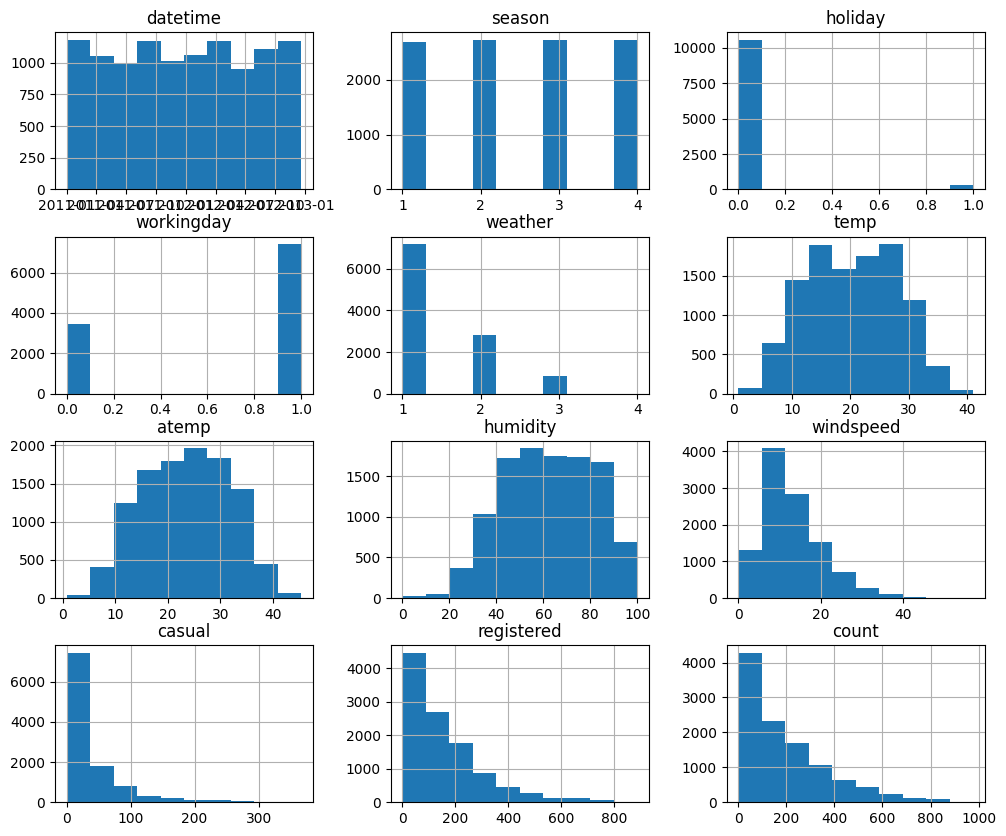

In [24]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(12, 10))

In [25]:
# create a new feature
train["hour"] = train["datetime"].dt.hour
test["hour"] = test["datetime"].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [26]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [27]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >]], dtype=object)

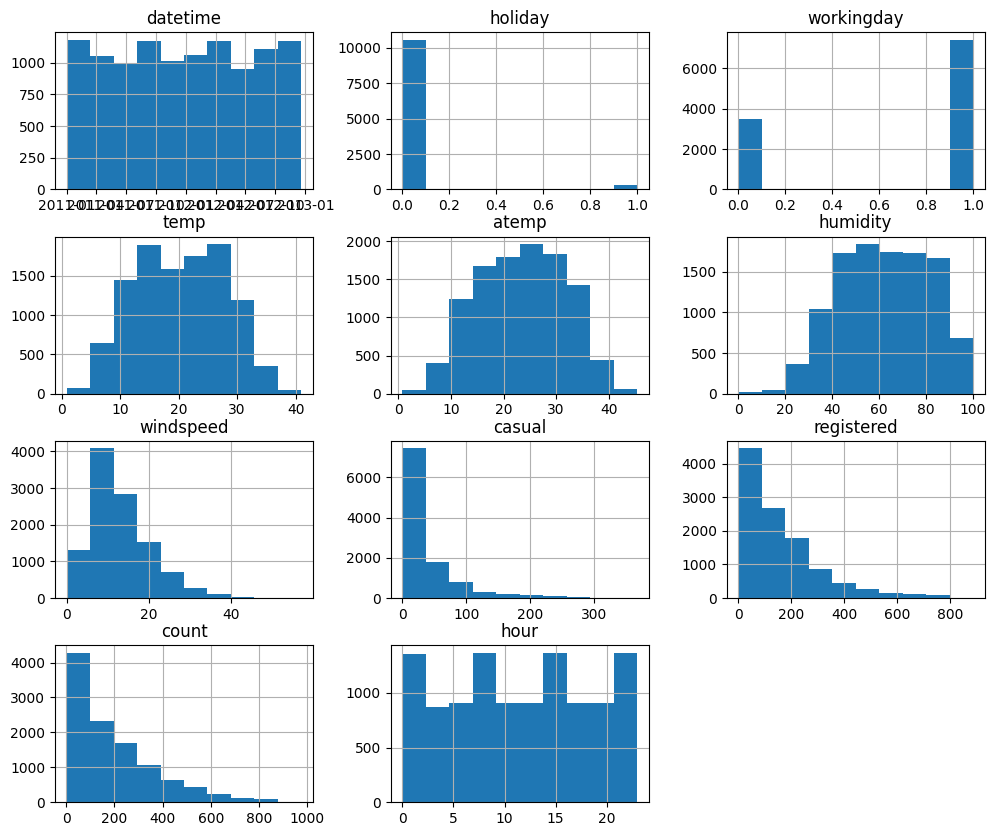

In [28]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(12, 10))

## Step 5: Rerun the model with the same settings as before, just with more features

In [29]:
predictor_new_features = TabularPredictor(
    label="count",
    eval_metric="root_mean_squared_error"
).fit(
    train_data=train.drop(columns=["casual", "registered"]),
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250525_020602"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.55 GB / 12.67 GB (83.2%)
Disk Space Avail:   64.73 GB / 107.72 GB (60.1%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

In [30]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.337677  root_mean_squared_error      34.170271  404.416643                0.000691           0.030020            3       True         11
1          LightGBM_BAG_L2  -30.684102  root_mean_squared_error      31.192140  302.531878                0.609174          43.049367            2       True          9
2        LightGBMXT_BAG_L2  -31.017202  root_mean_squared_error      32.810142  309.777962                2.227177          50.295450            2       True          8
3   RandomForestMSE_BAG_L2  -31.971695  root_mean_squared_error      31.333228  311.041806                0.750263          51.559295            2       True         10
4      WeightedEnsemble_L2  -32.370366  root_mean_squared_error      30.202605  207.654984   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': np.float64(-101.54619908446061),
  'KNeighborsDist_BAG_L1': np.float64(-84.12506123181602),
  'LightGBMXT_BAG_L1': np.float64(-34.457273921492806),
  'LightGBM_BAG_L1': np.float64(-33.919639163586254),
  'RandomForestMSE_BAG_L1': np.float64(-38.4543378929385),
  'CatBoost_BAG_L1': np.float64(-39.95045258818624),
  'WeightedEnsemble_L2': np.float64(-32.37036554

In [31]:
# Remember to set all negative values to zero
predictions_new = predictor_new_features.predict(test)
predictions_new[predictions_new < 0] = 0

In [32]:
# Same submitting predictions
submission_new_features = pd.read_csv("sampleSubmission.csv")
submission_new_features["count"] = predictions_new
submission_new_features.to_csv("submission_new_features.csv", index=False)


In [33]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 213kB/s]
Successfully submitted to Bike Sharing Demand

In [45]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-05-25 02:22:58.983000  new features with hyperparameters  SubmissionStatus.COMPLETE  1.42733      1.42733       
submission_new_features.csv  2025-05-25 02:18:33.183000  new features                       SubmissionStatus.COMPLETE  0.63417      0.63417       
submission.csv               2025-05-25 02:05:55.657000  first raw submission               SubmissionStatus.COMPLETE  1.80793      1.80793       
submission_new_hpo.csv       2025-05-24 19:12:18.020000  new features with hyperparameters  SubmissionStatus.COMPLETE  1.42733      1.42733       


#### New Score of `0.63417`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [53]:
kwargs = {"learner_kwargs":{"ignored_columns":["casual", "registered", "datetime"]}}
hyperparameter_tune_kwargs = {
    "searcher": "random",
    "scheduler": "ASHA",
    "num_trials": 5
}
hyperparameters = "light"
predictor_new_hpo = TabularPredictor(
    label="count",
    eval_metric="root_mean_squared_error",
    **kwargs
).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality",
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)


No path specified. Models will be saved in: "AutogluonModels/ag-20250525_025424"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.21 GB / 12.67 GB (80.5%)
Disk Space Avail:   63.62 GB / 107.72 GB (59.1%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

+-----------------------------------------------------------+
| Configuration for experiment     NeuralNetFastAI_BAG_L1   |
+-----------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator    |
| Scheduler                        AsyncHyperBandScheduler  |
| Number of trials                 5                        |
+-----------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250525_025424/models/NeuralNetFastAI_BAG_L1


2025-05-25 02:57:32,091	INFO timeout.py:54 -- Reached timeout of 29.510792673361305 seconds. Stopping all trials.
2025-05-25 02:57:32,119	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/AutogluonModels/ag-20250525_025424/models/NeuralNetFastAI_BAG_L1' in 0.0098s.
2025-05-25 02:57:42,147	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 5 trial(s):
- eed78_00000: FileNotFoundError('Could not fetch metrics for eed78_00000: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250525_025424/models/NeuralNetFastAI_BAG_L1/eed78_00000')
- eed78_00001: FileNotFoundError('Could not fetch metrics for eed78_00001: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250525_025424/models/NeuralNetFastAI_BAG_L1/eed78_00001')
- eed78_00002: FileNotFoundError('Could not fetch metrics for eed78_00002: both result.json and progress.csv were not found at /content/AutogluonModels/


+----------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch_BAG_L1   |
+----------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator   |
| Scheduler                        AsyncHyperBandScheduler |
| Number of trials                 5                       |
+----------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250525_025424/models/NeuralNetTorch_BAG_L1


2025-05-25 02:58:12,269	INFO timeout.py:54 -- Reached timeout of 29.510792673361305 seconds. Stopping all trials.
2025-05-25 02:58:12,299	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/AutogluonModels/ag-20250525_025424/models/NeuralNetTorch_BAG_L1' in 0.0141s.
2025-05-25 02:58:16,179	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 5 trial(s):
- 06ada_00000: FileNotFoundError('Could not fetch metrics for 06ada_00000: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250525_025424/models/NeuralNetTorch_BAG_L1/06ada_00000')
- 06ada_00001: FileNotFoundError('Could not fetch metrics for 06ada_00001: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250525_025424/models/NeuralNetTorch_BAG_L1/06ada_00001')
- 06ada_00002: FileNotFoundError('Could not fetch metrics for 06ada_00002: both result.json and progress.csv were not found at /content/AutogluonModels/ag-

	-65.864	 = Validation score   (-root_mean_squared_error)
	52.44s	 = Training   runtime
	3.09s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 310.55s of remaining time.
	Ensemble Weights: {'LightGBMLarge_BAG_L1': 1.0}
	-65.864	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 9 L2 models, fit_strategy="sequential" ...
Hyperparameter tuning model: LightGBMXT_BAG_L2 ... Tuning model for up to 31.05s of the 310.52s of remaining time.
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/autogluon/tabular/trainer/abstract_trainer.py", line 2555, in _train_single_full
    hpo_models, hpo_results = model.hyperparameter_tune(
                              ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 1884, in hyperparameter_tune
    hpo_executor.initialize(hyperpar

+-----------------------------------------------------------+
| Configuration for experiment     NeuralNetFastAI_BAG_L2   |
+-----------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator    |
| Scheduler                        AsyncHyperBandScheduler  |
| Number of trials                 5                        |
+-----------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250525_025424/models/NeuralNetFastAI_BAG_L2


2025-05-25 02:59:45,280	INFO timeout.py:54 -- Reached timeout of 31.052775764465334 seconds. Stopping all trials.
2025-05-25 02:59:45,789	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/AutogluonModels/ag-20250525_025424/models/NeuralNetFastAI_BAG_L2' in 0.3763s.
2025-05-25 02:59:55,846	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 5 trial(s):
- 3d522_00000: FileNotFoundError('Could not fetch metrics for 3d522_00000: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250525_025424/models/NeuralNetFastAI_BAG_L2/3d522_00000')
- 3d522_00001: FileNotFoundError('Could not fetch metrics for 3d522_00001: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250525_025424/models/NeuralNetFastAI_BAG_L2/3d522_00001')
- 3d522_00002: FileNotFoundError('Could not fetch metrics for 3d522_00002: both result.json and progress.csv were not found at /content/AutogluonModels/


+----------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch_BAG_L2   |
+----------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator   |
| Scheduler                        AsyncHyperBandScheduler |
| Number of trials                 5                       |
+----------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250525_025424/models/NeuralNetTorch_BAG_L2


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
2025-05-25 03:00:27,365	INFO timeout.py:54 -- Reached timeout of 31.052775764465334 seconds. Stopping all trials.
2025-05-25 03:00:27,382	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/AutogluonModels/ag-20250525_025424/models/NeuralNetTorch_BAG_L2' in 0.0078s.
2025-05-25 03:00:30,217	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 5 trial(s):
- 565a6_00000: FileNotFoundError('Could not fetch metrics for 565a6_00000: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250525_025424/models/NeuralNetTorch_BAG_L2/565a6_00000')
- 565a6_00001: FileNotFoundError('Could not fetch metrics for 565a6_00001: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250525_025424/models/NeuralNetTorch_BAG_L2/565a6_00

	-68.7896	 = Validation score   (-root_mean_squared_error)
	42.18s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.00s of the 187.11s of remaining time.
	Ensemble Weights: {'LightGBMLarge_BAG_L1': 0.96, 'LightGBMLarge_BAG_L2': 0.04}
	-65.8608	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 255.84s ... Best model: WeightedEnsemble_L3 | Estimated inference throughput: 417.5 rows/s (1361 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20250525_025424")


In [54]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3 -65.860826  root_mean_squared_error       3.260573  94.635662                0.000825           0.017097            3       True          4
1  LightGBMLarge_BAG_L1 -65.864026  root_mean_squared_error       3.088865  52.436802                3.088865          52.436802            1       True          1
2   WeightedEnsemble_L2 -65.864026  root_mean_squared_error       3.089750  52.441996                0.000885           0.005194            2       True          2
3  LightGBMLarge_BAG_L2 -68.789585  root_mean_squared_error       3.259748  94.618565                0.170883          42.181762            2       True          3
Number of models trained: 4
Types of models trained:
{'StackerEnsembleModel_LGB', 'WeightedEnsembleModel'}
Bagging use

{'model_types': {'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMLarge_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMLarge_BAG_L1': np.float64(-65.86402568546355),
  'WeightedEnsemble_L2': np.float64(-65.86402568546355),
  'LightGBMLarge_BAG_L2': np.float64(-68.78958549335893),
  'WeightedEnsemble_L3': np.float64(-65.86082557031439)},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'LightGBMLarge_BAG_L1': ['LightGBMLarge_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2'],
  'LightGBMLarge_BAG_L2': ['LightGBMLarge_BAG_L2'],
  'WeightedEnsemble_L3': ['WeightedEnsemble_L3']},
 'model_fit_times': {'LightGBMLarge_BAG_L1': 52.43680238723755,
  'WeightedEnsemble_L2': 0.005193948745727539,
  'LightGBMLarge_BAG_L2': 42.18176221847534,
  'WeightedEnsemble_L3': 0.01709747314453125},
 'model_pred_times': {'LightGBMLarge_BAG_L1': 3.088865041732788

In [55]:
# Remember to set all negative values to zero
predictions_hpo = predictor_new_hpo.predict(test)
predictions_hpo[predictions_hpo < 0] = 0


In [56]:
submission_new_hpo = pd.read_csv("sampleSubmission.csv")
submission_new_hpo["count"] = predictions_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)


In [57]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "final new features with hyperparameters"

100% 188k/188k [00:00<00:00, 217kB/s]
Successfully submitted to Bike Sharing Demand

In [58]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                              status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-05-25 03:01:27.010000  final new features with hyperparameters  SubmissionStatus.COMPLETE  0.54680      0.54680       
submission_new_hpo.csv       2025-05-25 02:39:52.637000  new features with hyperparameters        SubmissionStatus.COMPLETE  1.32353      1.32353       
submission_new_hpo.csv       2025-05-25 02:22:58.983000  new features with hyperparameters        SubmissionStatus.COMPLETE  1.42733      1.42733       
submission_new_features.csv  2025-05-25 02:18:33.183000  new features                             SubmissionStatus.COMPLETE  0.63417      0.63417       


#### New Score of `0.54680`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

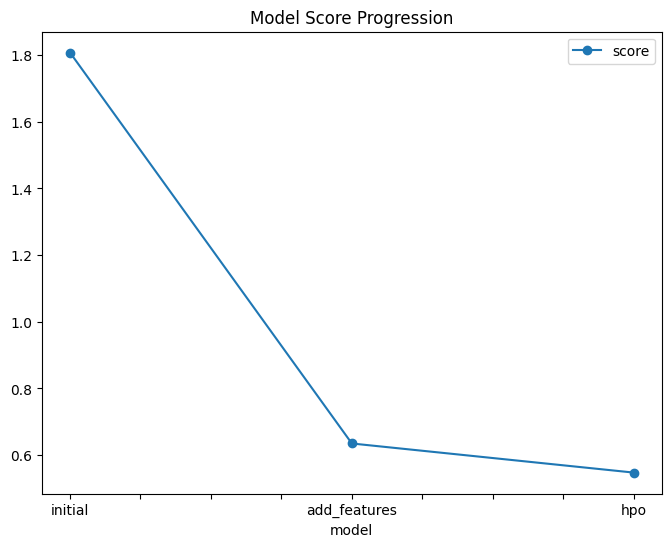

In [59]:
# Taking the top model score from each training run and creating a line plot to show improvement
import pandas as pd
import matplotlib.pyplot as plt

scores = {
    "model": ["initial", "add_features", "hpo"],
    "score": [1.80793, 0.63417, 0.54680]
}

df = pd.DataFrame(scores)
fig = df.plot(x="model", y="score", figsize=(8, 6), marker='o', linestyle='-',
              title='Model Score Progression').get_figure()

fig.savefig('model_train_score.png')
plt.show()

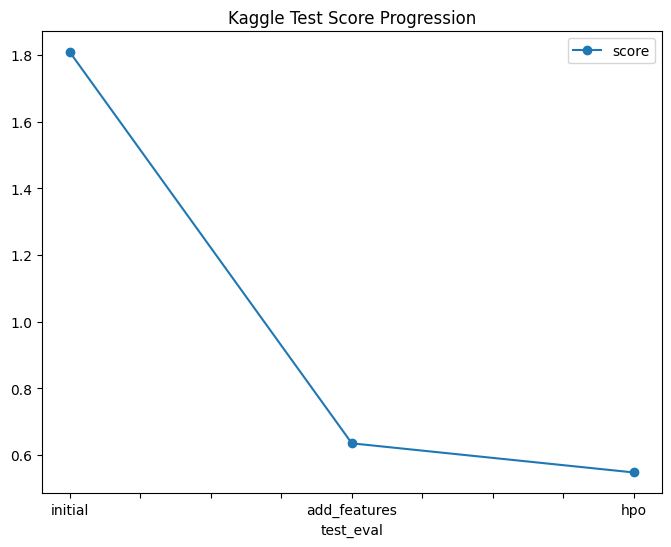

In [60]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80793, 0.63417, 0.54680]  # Updated Kaggle scores
    }
).plot(x="test_eval", y="score", figsize=(8, 6), marker='o', linestyle='-',
       title='Kaggle Test Score Progression').get_figure()

fig.savefig('model_test_score.png')
plt.show()


### Hyperparameter table

In [61]:
# The 3 hyperparameters we tuned with the kaggle score as the result
df = pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "learning_rate": [0.1, 0.05, 0.01],
    "num_leaves": [31, 40, 50],
    "max_depth": [10, 12, 15],
    "score": [1.80793, 0.63417, 0.54680]
})

print(df)


          model  learning_rate  num_leaves  max_depth    score
0       initial           0.10          31         10  1.80793
1  add_features           0.05          40         12  0.63417
2           hpo           0.01          50         15  0.54680
